In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
data_train= pd.read_csv(r"twitter_training.csv")
data_test= pd.read_csv(r"twitter_validation.csv")

In [3]:
data_train

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
data_test

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [5]:
data_train.columns = ['id', 'entity', 'sentiment', 'text']
data_test.columns = ['id', 'entity', 'sentiment', 'text']

## Training data Overview

In [6]:
data_train

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
data_train.describe(include='all')

,id,entity,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [8]:
data_train.drop_duplicates(inplace=True)

In [9]:
data_train.isnull().sum()

id             0
entity         0
sentiment      0
text         326
dtype: int64

In [10]:
data_train = data_train.dropna()

In [11]:
data_train.isnull().sum()

id           0
entity       0
sentiment    0
text         0
dtype: int64

## Test data Overview

In [12]:
data_test

,id,entity,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
data_test.describe(include='all')

,id,entity,sentiment,text
count,999.000000,999,999,999
unique,NaN,32,4,998
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6435.159159,NaN,NaN,NaN
std,3728.912226,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3241.500000,NaN,NaN,NaN
50%,6560.000000,NaN,NaN,NaN
75%,9662.500000,NaN,NaN,NaN


In [14]:
data_test.drop_duplicates(inplace=True)

In [15]:
data_test.isnull().sum()

id           0
entity       0
sentiment    0
text         0
dtype: int64

In [16]:
data_train.sentiment=data_train.sentiment.replace('Irrelevant' , 'Neutral')
data_test.sentiment=data_test.sentiment.replace('Irrelevant' , 'Neutral')

In [17]:
sentiment_count=data_train.sentiment.value_counts()

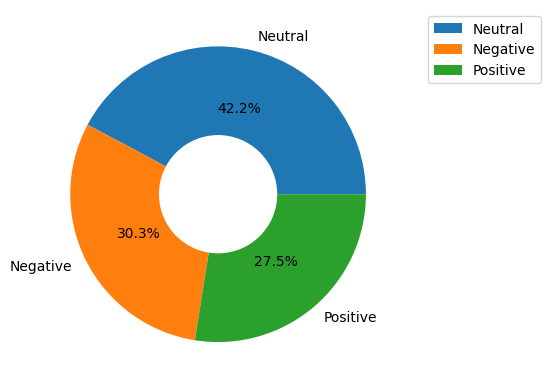

In [18]:
y=['Neutral' , 'Negative' , 'Positive']
plt.pie(sentiment_count , labels=y, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.4, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

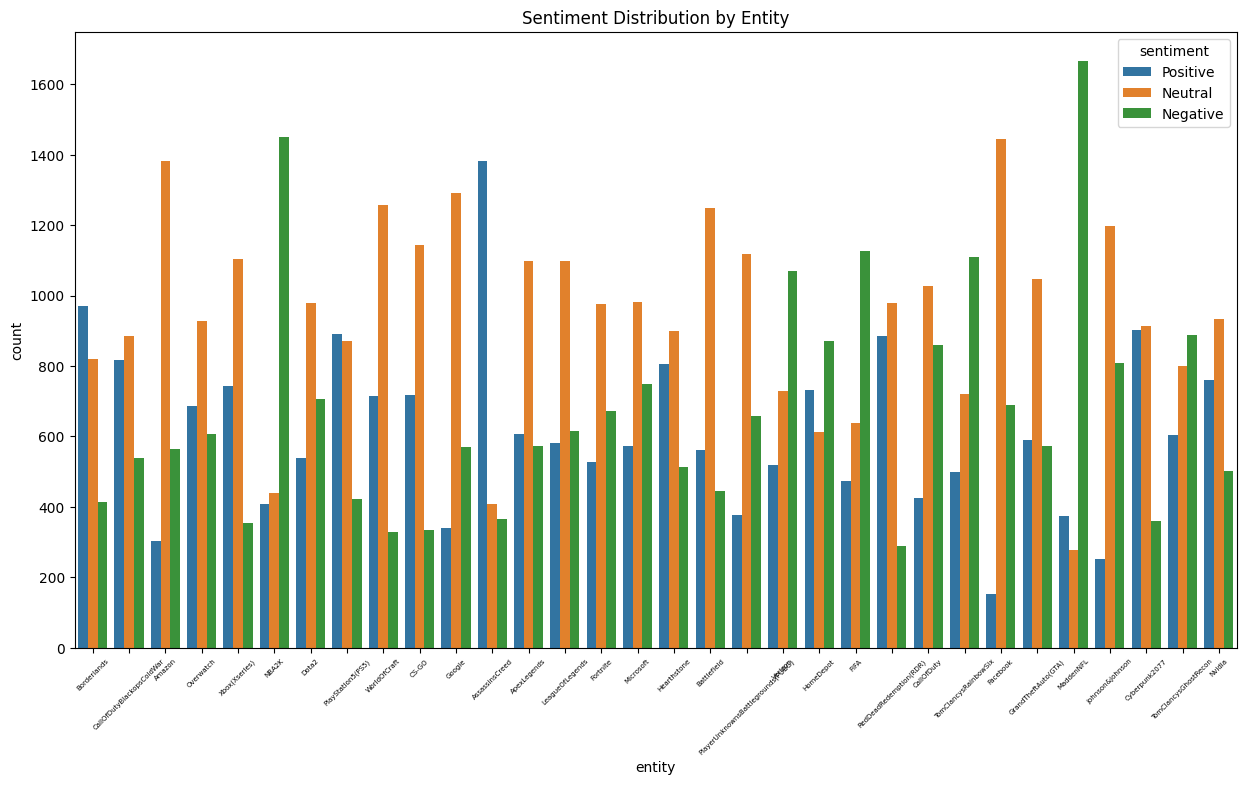

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(x='entity', hue='sentiment', data=data_train)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()

In [20]:
data_train.entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [21]:
Entity_count=data_train.entity.value_counts()
Entity_sort=Entity_count.sort_values(ascending=False)

In [22]:
Entity_top10=Entity_sort.head(10)
Entity_top10

entity
TomClancysRainbowSix    2328
Verizon                 2319
MaddenNFL               2315
CallOfDuty              2314
Microsoft               2304
WorldOfCraft            2300
NBA2K                   2299
LeagueOfLegends         2296
TomClancysGhostRecon    2291
Facebook                2289
Name: count, dtype: int64

In [23]:
Entity_index=Entity_top10.index

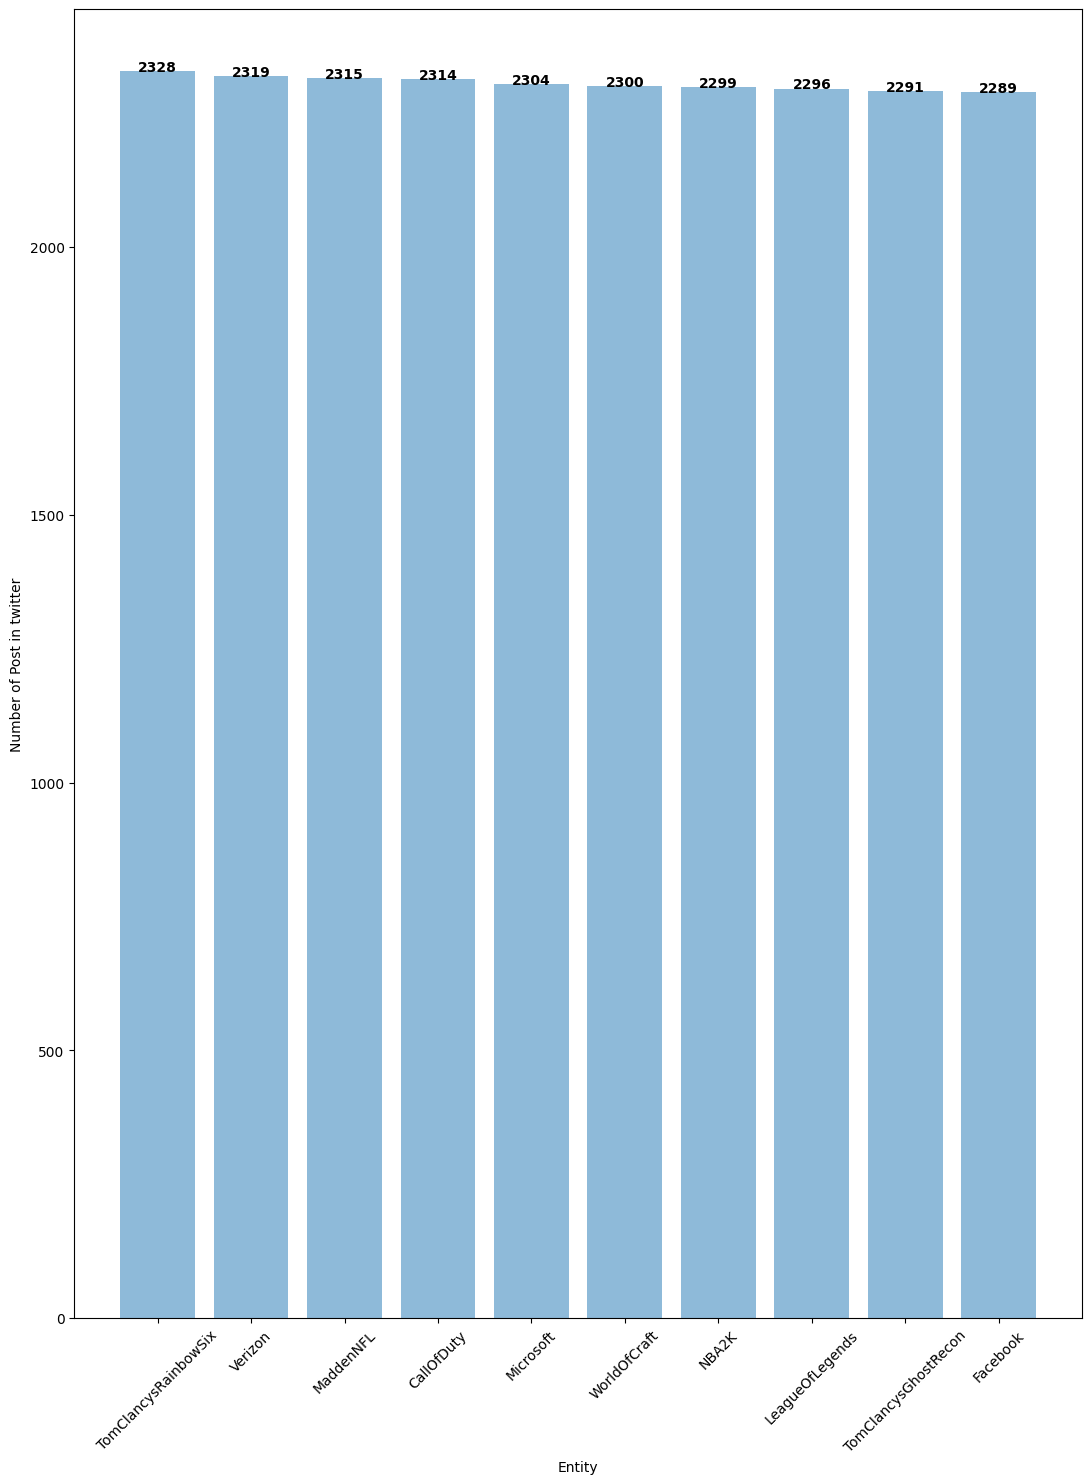

In [24]:
plt.figure(figsize=(13,17))

x=['TomClancysRainbowSix','Verizon','MaddenNFL','CallOfDuty','Microsoft','WorldOfCraft','NBA2K','LeagueOfLegends','TomClancysGhostRecon','Facebook']
y=[2328,2319,2315,2314,2304,2300,2299,2296,2291,2289]

plt.bar( x , y , alpha=0.5)

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold' )

plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Post in twitter')
plt.show()

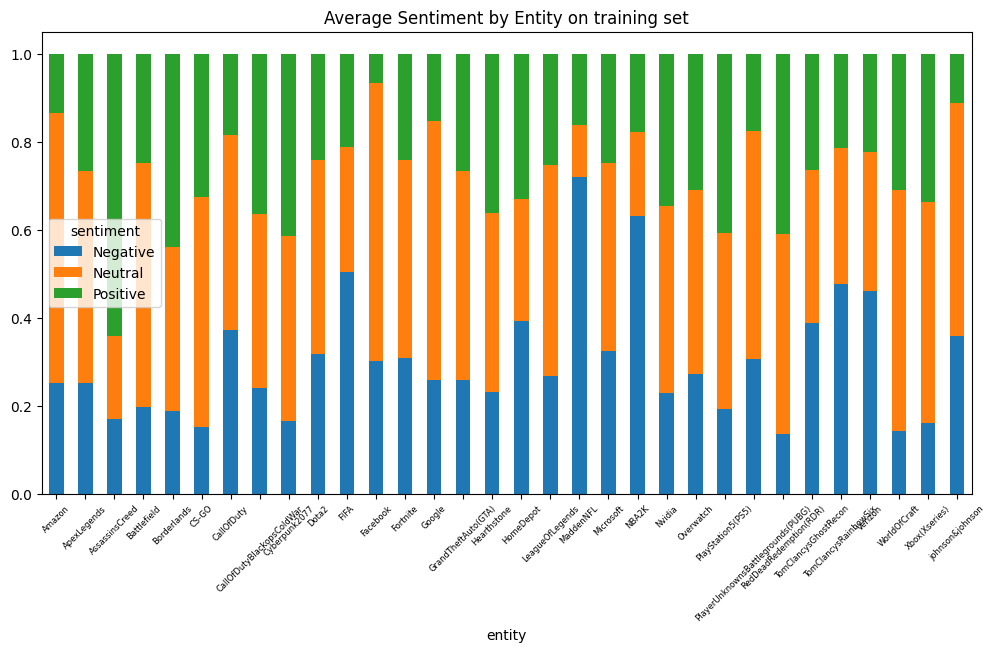

In [25]:
average_sentiment_by_entity = data_train.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity on training set')
plt.xticks(rotation=45, fontsize=6)
plt.show()

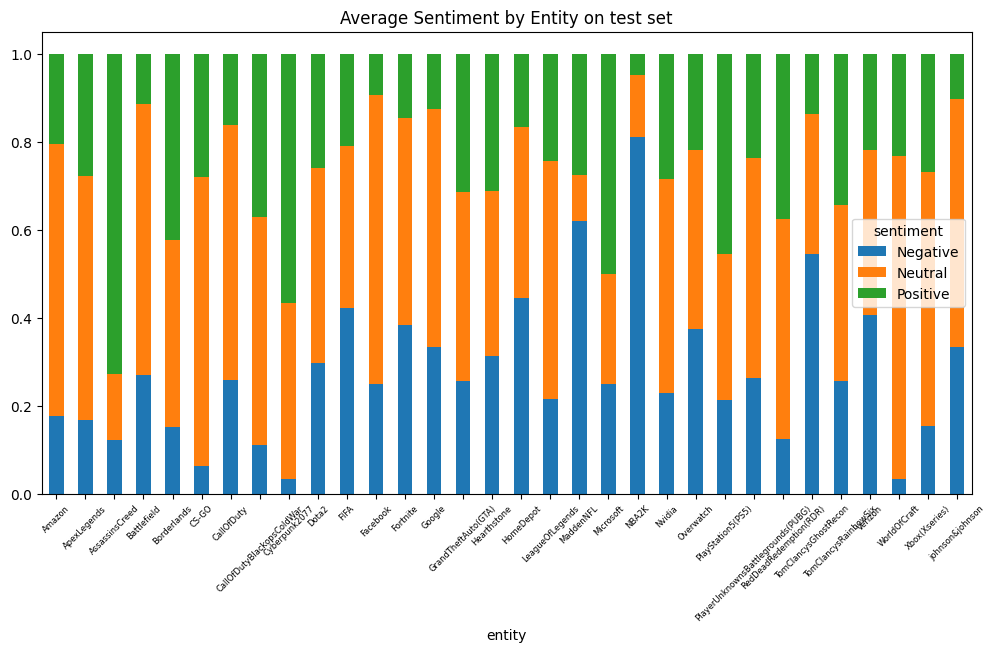

In [26]:
average_sentiment_by_entity = data_test.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity on test set')
plt.xticks(rotation=45, fontsize=6)
plt.show()

In [28]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [29]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [30]:
data_train["text"] = data_train["text"].apply(clean)

In [31]:
data_train.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,come border kill
1,2401,Borderlands,Positive,im get borderland kill
2,2401,Borderlands,Positive,im come borderland murder
3,2401,Borderlands,Positive,im get borderland murder
4,2401,Borderlands,Positive,im get borderland murder


In [33]:
from wordcloud import WordCloud,STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

In [34]:
from PIL import Image, ImageDraw, ImageFont

## Word cloud for Training dataset 

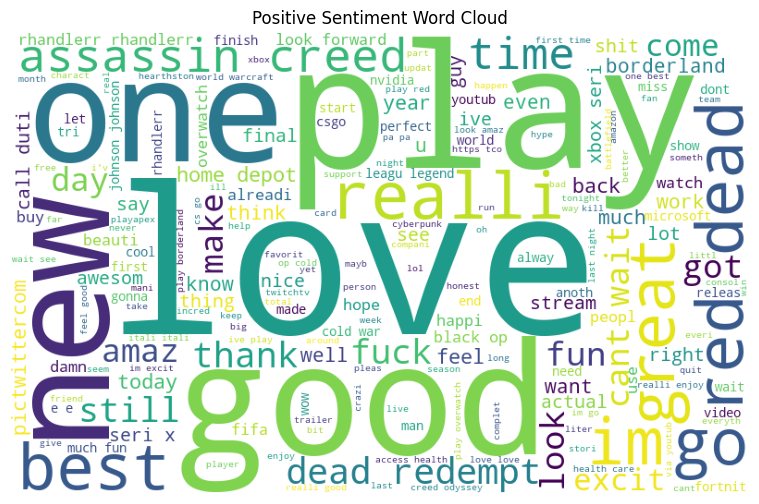

In [35]:
positive_data = data_train[data_train['sentiment'] == 'Positive']['text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

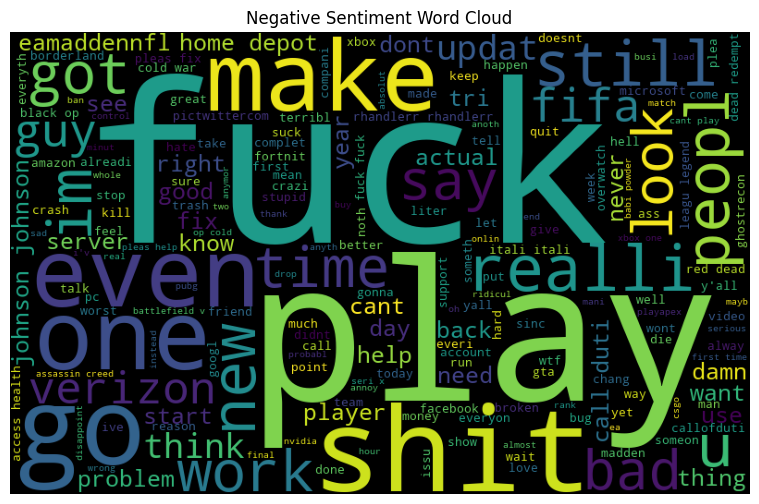

In [36]:
negative_data = data_train[data_train['sentiment'] == 'Negative']['text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='black').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

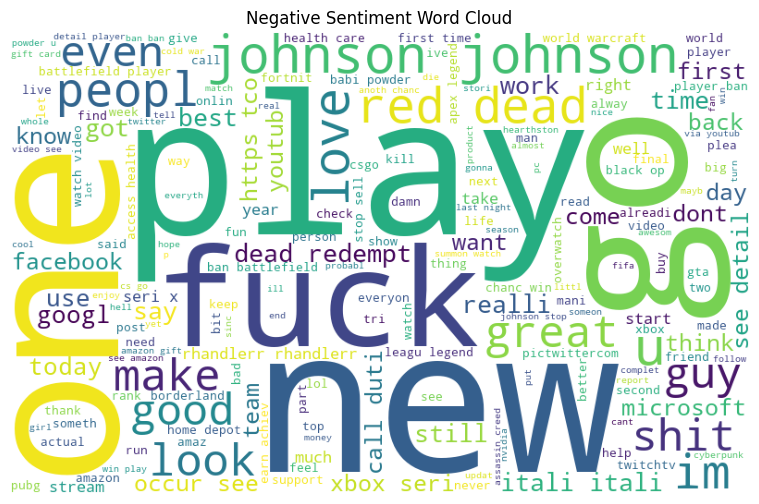

In [37]:
neutral_data = data_train[data_train['sentiment'] == 'Neutral']['text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

## Word cloud for Test dataset  

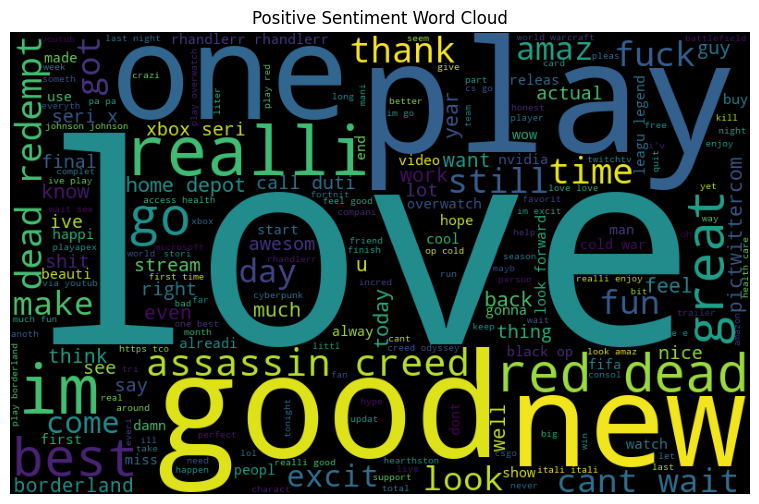

In [38]:
positive_data = data_train[data_train['sentiment'] == 'Positive']['text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=500, background_color='black').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

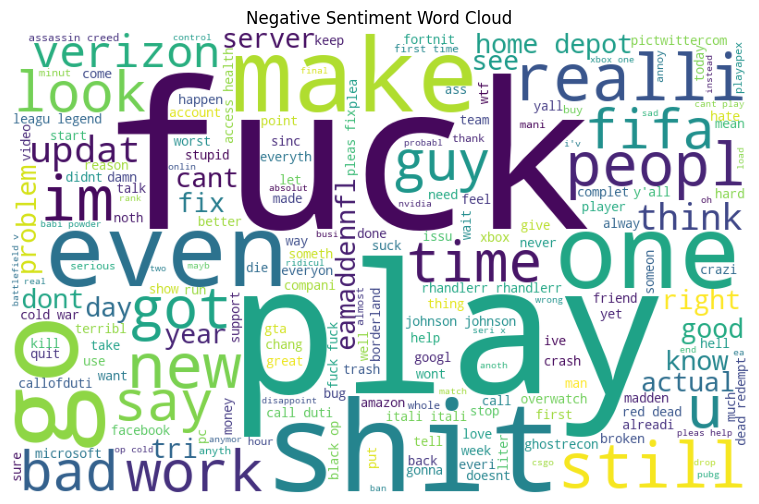

In [39]:
negative_data = data_train[data_train['sentiment'] == 'Negative']['text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
negative_data = negative_data.replace("game", "")
if negative_data.strip():
    wc = WordCloud(width=800, height=500, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

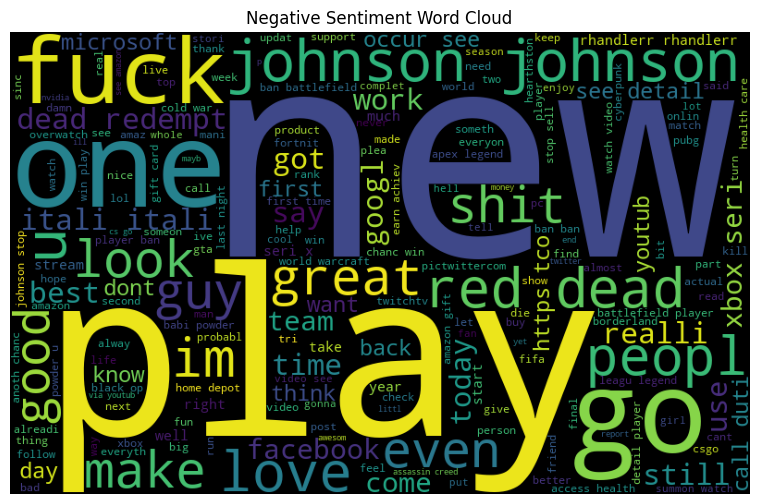

In [40]:
neutral_data = data_train[data_train['sentiment'] == 'Neutral']['text'].str.cat(sep=" ")

# Exclude the word "game" from the text data
neutral_data = neutral_data.replace("game", "")
if neutral_data.strip():
    wc = WordCloud(width=800, height=500, background_color='black').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

In [41]:
data_train.drop(['id'] , axis=1 , inplace=True)

In [42]:
data_test.drop(['id'] , axis=1 , inplace=True)

In [43]:
X_train=data_train.drop(['sentiment'] , axis=1)
X_test=data_test.drop(['sentiment'] , axis=1)
y_train=data_train['sentiment']
y_test=data_test['sentiment']

In [44]:
data_train.sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.text)

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [48]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

In [49]:
X_train.drop(['entity'],axis=1,inplace=True)
X_test.drop(['entity'],axis=1,inplace=True)

In [50]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [51]:
comment=[
    'I am happy to hear this.'
]
comment_count=v.transform(comment)
model.predict(comment_count)

array([1])

In [52]:
comment=[
    '"Anyone that plays a bad luck albatross deck in hearthstone is a literal cop.'
]
comment_count=v.transform(comment)
model.predict(comment_count)

array([1])

In [53]:
X_test_count=v.transform(X_test.text)
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
X_test_count.shape

(999, 24769)

In [55]:
model.score(X_test_count,y_test)

0.6946946946946947